In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:


print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)



Python version 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.23.0
Matplotlib version 2.2.2


In [3]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [4]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [5]:


df.head()



,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [6]:
from injector import Injector
from shared.path_service import PathService
injector = Injector()
path_service:PathService = injector.get(PathService)

In [7]:
xlsx_path = path_service.get_resource("Lesson3.xlsx")

In [8]:
# Save results to excel
df.to_excel(xlsx_path, index=False)
print('Done')

Done


In [9]:
# Parse a specific sheet
df = pd.read_excel(xlsx_path, 0, index_col='StatusDate')
df.dtypes



State            object
Status            int64
CustomerCount     int64
dtype: object

In [10]:


df.index



DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [11]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [12]:
df.State.unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [13]:
df['State'] = df.State.apply(lambda x:x.upper())

In [14]:
df.State.unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [15]:
df.loc[df['State']=='NJ','State'] = 'NY'

In [16]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY'], dtype=object)

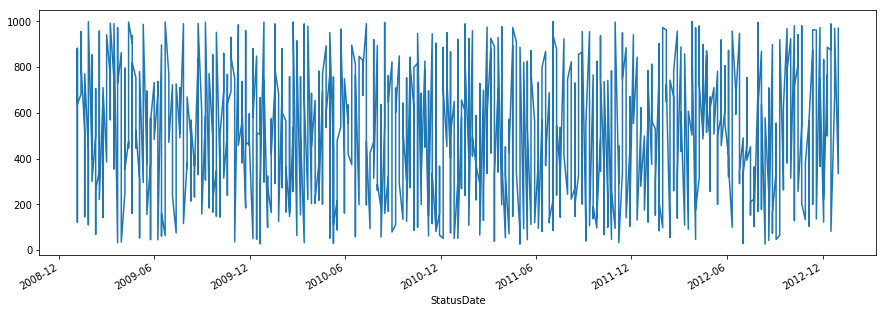

In [17]:
df['CustomerCount'].plot(figsize=(15,5))

In [18]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,2,882
2009-01-19,NY,1,522
2009-01-26,NY,2,999
2009-02-09,NY,2,500
2009-02-23,NY,1,710
2009-03-02,NY,2,385
2009-03-02,NY,3,728
2009-03-02,NY,3,941
2009-03-09,NY,3,606


In [19]:
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Status</th>
      <th>CustomerCount</th>
    </tr>
    <tr>
      <th>State</th>
      <th>StatusDate</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">FL</th>
      <th>2009-01-05</th>
      <td>6</td>
      <td>760</td>
    </tr>
    <tr>
      <th>2009-01-12</th>
      <td>7</td>
      <td>2538</td>
    </tr>
    <tr>
      <th>2009-01-19</th>
      <td>6</td>
      <td>895</td>
    </tr>
    <tr>
      <th>2009-01-26</th>
      <td>6</td>
      <td>547</td>
    </tr>
    <tr>
      <th>2009-02-02</th>
      <td>4</td>
      <td>1506</td>
    </tr>
  </tbody>
</table>
</div>

In [20]:
del Daily['Status']
Daily.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>CustomerCount</th>
    </tr>
    <tr>
      <th>State</th>
      <th>StatusDate</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">FL</th>
      <th>2009-01-05</th>
      <td>760</td>
    </tr>
    <tr>
      <th>2009-01-12</th>
      <td>2538</td>
    </tr>
    <tr>
      <th>2009-01-19</th>
      <td>895</td>
    </tr>
    <tr>
      <th>2009-01-26</th>
      <td>547</td>
    </tr>
    <tr>
      <th>2009-02-02</th>
      <td>1506</td>
    </tr>
  </tbody>
</table>
</div>

In [21]:
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-09 00:00:00, 2009-02-16 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-15 00:00:00, 2009-06-22 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-03 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-09 00:00:00, 2009-11-1

In [22]:
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [23]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=209, freq=None)

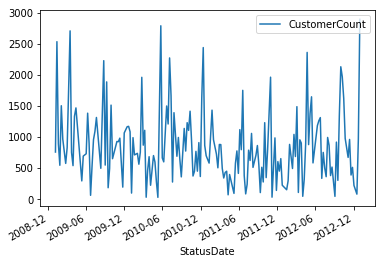

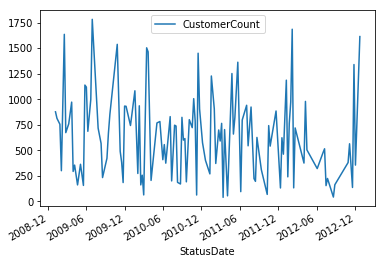

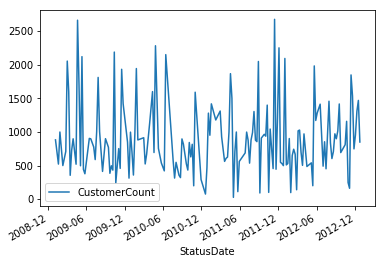

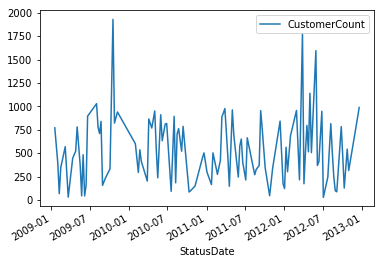

In [24]:


Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();



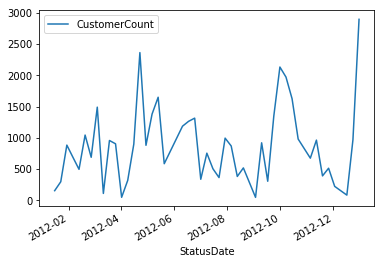

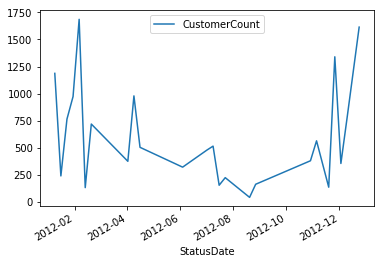

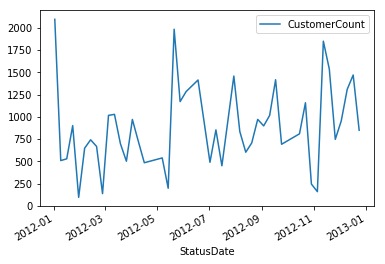

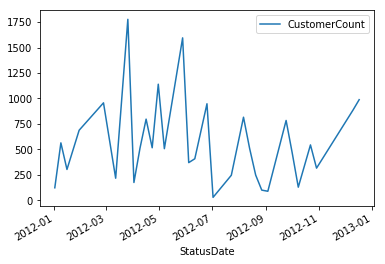

In [25]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();

In [26]:
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])

In [27]:
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

In [28]:
Daily.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>CustomerCount</th>
      <th>Lower</th>
      <th>Upper</th>
      <th>Outlier</th>
    </tr>
    <tr>
      <th>State</th>
      <th>StatusDate</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">FL</th>
      <th>2009-01-05</th>
      <td>760</td>
      <td>-545.125</td>
      <td>2557.625</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2009-01-12</th>
      <td>2538</td>
      <td>-545.125</td>
      <td>2557.625</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2009-01-19</th>
      <td>895</td>
      <td>-545.125</td>
      <td>2557.625</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2009-01-26</th>
      <td>547</td>
      <td>-545.125</td>
      <td>2557.625</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2009-02-02</th>
      <td>1506</td>
      <td>-310.250</td>
      <td>2320.750</td>
      <td>False</td>
    </tr>
  </tbody>
</table>
</div>

In [29]:

ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,2519,3351
2009-01-12,3351,3351
2009-01-19,2188,3351
2009-01-26,2301,3351
2009-02-02,2204,2204


In [30]:
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [31]:
combined = pd.concat([ALL,BHAG], axis=0,sort=True)
combined = combined.sort_index(axis=0)
combined.tail()

,BHAG,CustomerCount,Max
2012-12-17,NaN,2539.0,3433.0
2012-12-24,NaN,3433.0,3433.0
2012-12-31,NaN,2898.0,3433.0
2012-12-31,2000.0,NaN,NaN
2013-12-31,3000.0,NaN,NaN


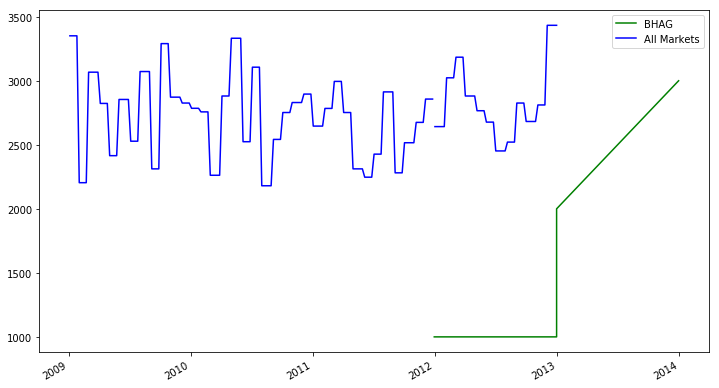

In [32]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best');

In [33]:


# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year



,BHAG,CustomerCount,Max
2009,NaN,3351.0,3351.0
2010,NaN,3332.0,3332.0
2011,1000.0,2995.0,2995.0
2012,2000.0,3433.0,3433.0
2013,3000.0,NaN,NaN


In [34]:


# Add a column representing the percent change per year
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year



,BHAG,CustomerCount,Max,YR_PCT_Change
2009,NaN,3351.0,3351.0,NaN
2010,NaN,3332.0,3332.0,-0.005670
2011,1000.0,2995.0,2995.0,-0.101140
2012,2000.0,3433.0,3433.0,0.146244
2013,3000.0,NaN,NaN,0.000000


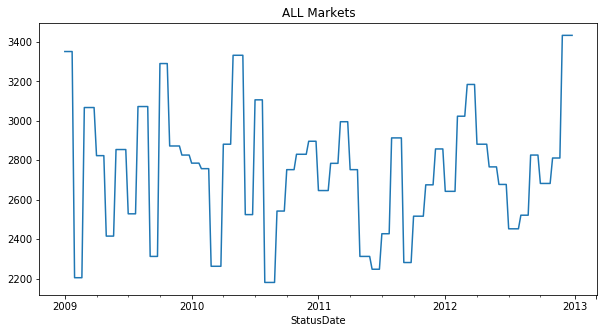

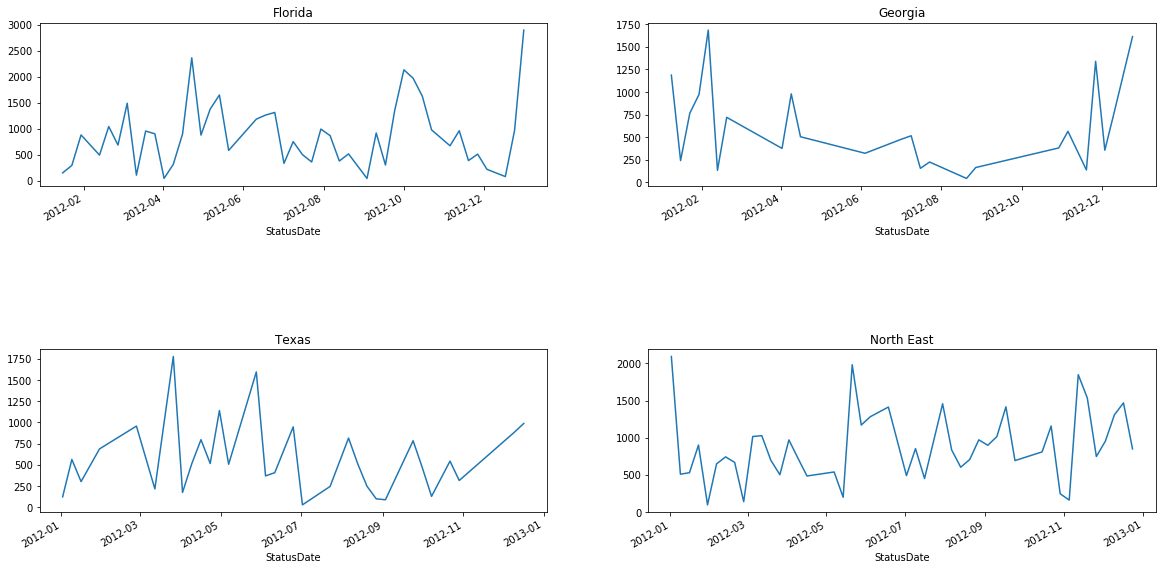

In [35]:
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

# Add titles
axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East');